# Question 1

- Learn and understand Zipf’s Law.
- Pick any file (or files) in NLTK package.
- Prove if Zipf’s Law works in Natural Language or not.

- REQUIREMNTS: (Must Do) 
- Use ’glob’ to open and read file. If multiple files use LOOP achieve. 
- Create at least one function and lambda function
- Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK. 
- Open your CSV file, generate a log 
- Write a conclusion at the end of your code base on figure. 

In [13]:

# Open file using glob
import glob,codecs,string,re
path = '/Users/vega/nltk_data/corpora/webtext/*.txt'   
files=glob.glob(path) 
for file in files:     
    f= codecs.open(file, 'r', encoding='utf8',errors='ignore')
    webtext = [word for line in f for word in line.split()]
    f.close()

#Function to remove digits and punctuation
def getOnlyWords(wordSet):
    wordsLower = [w.lower() for w in wordSet if not w.isdigit()] 
    wordsOnly = [w for w in wordsLower if not re.fullmatch('[' + string.punctuation + ']+', w)]
    return wordsOnly

#calculate frequency
webwords = getOnlyWords(webtext)
frequency = list((i,webwords.count(i)) for i in set(webwords))  

#Sort in descending order
sortedDict = sorted(frequency, key=lambda freq: freq[1],reverse=True)   # sort by freq

#Add rank to sorted list
value = 1
desired_list = []
for u in sortedDict:
    desired_list.append(u + (value,))
    value = value + 1

In [14]:
# Create csv file

import csv
a = [['Word','Frequency','Rank']]
path = "Processed Data"
with open(path+'\\'+'outputQues1.csv','w') as f:
    writer = csv.writer(f)
    writer.writerows(a)
    writer.writerows(desired_list)

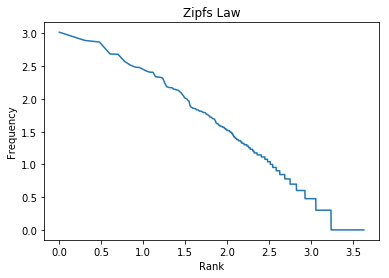

In [15]:
#Create Matplot lib file

import matplotlib.pyplot as plt
import math

x = [math.log10(a[2]) for a in desired_list]

y = [math.log10(a[1]) for a in desired_list]

plt.plot(x, y)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Zipfs Law")
plt.show()